In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886040401PNS003SRSPEC0020.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.701e-03 +/- 7.808e-04 (64.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-9
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.73e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040401PNS003BGSPEC0020.FTZ
  Background Exposure Time: 1.73e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY4.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040401PNS003SRCARF0020.FTZ



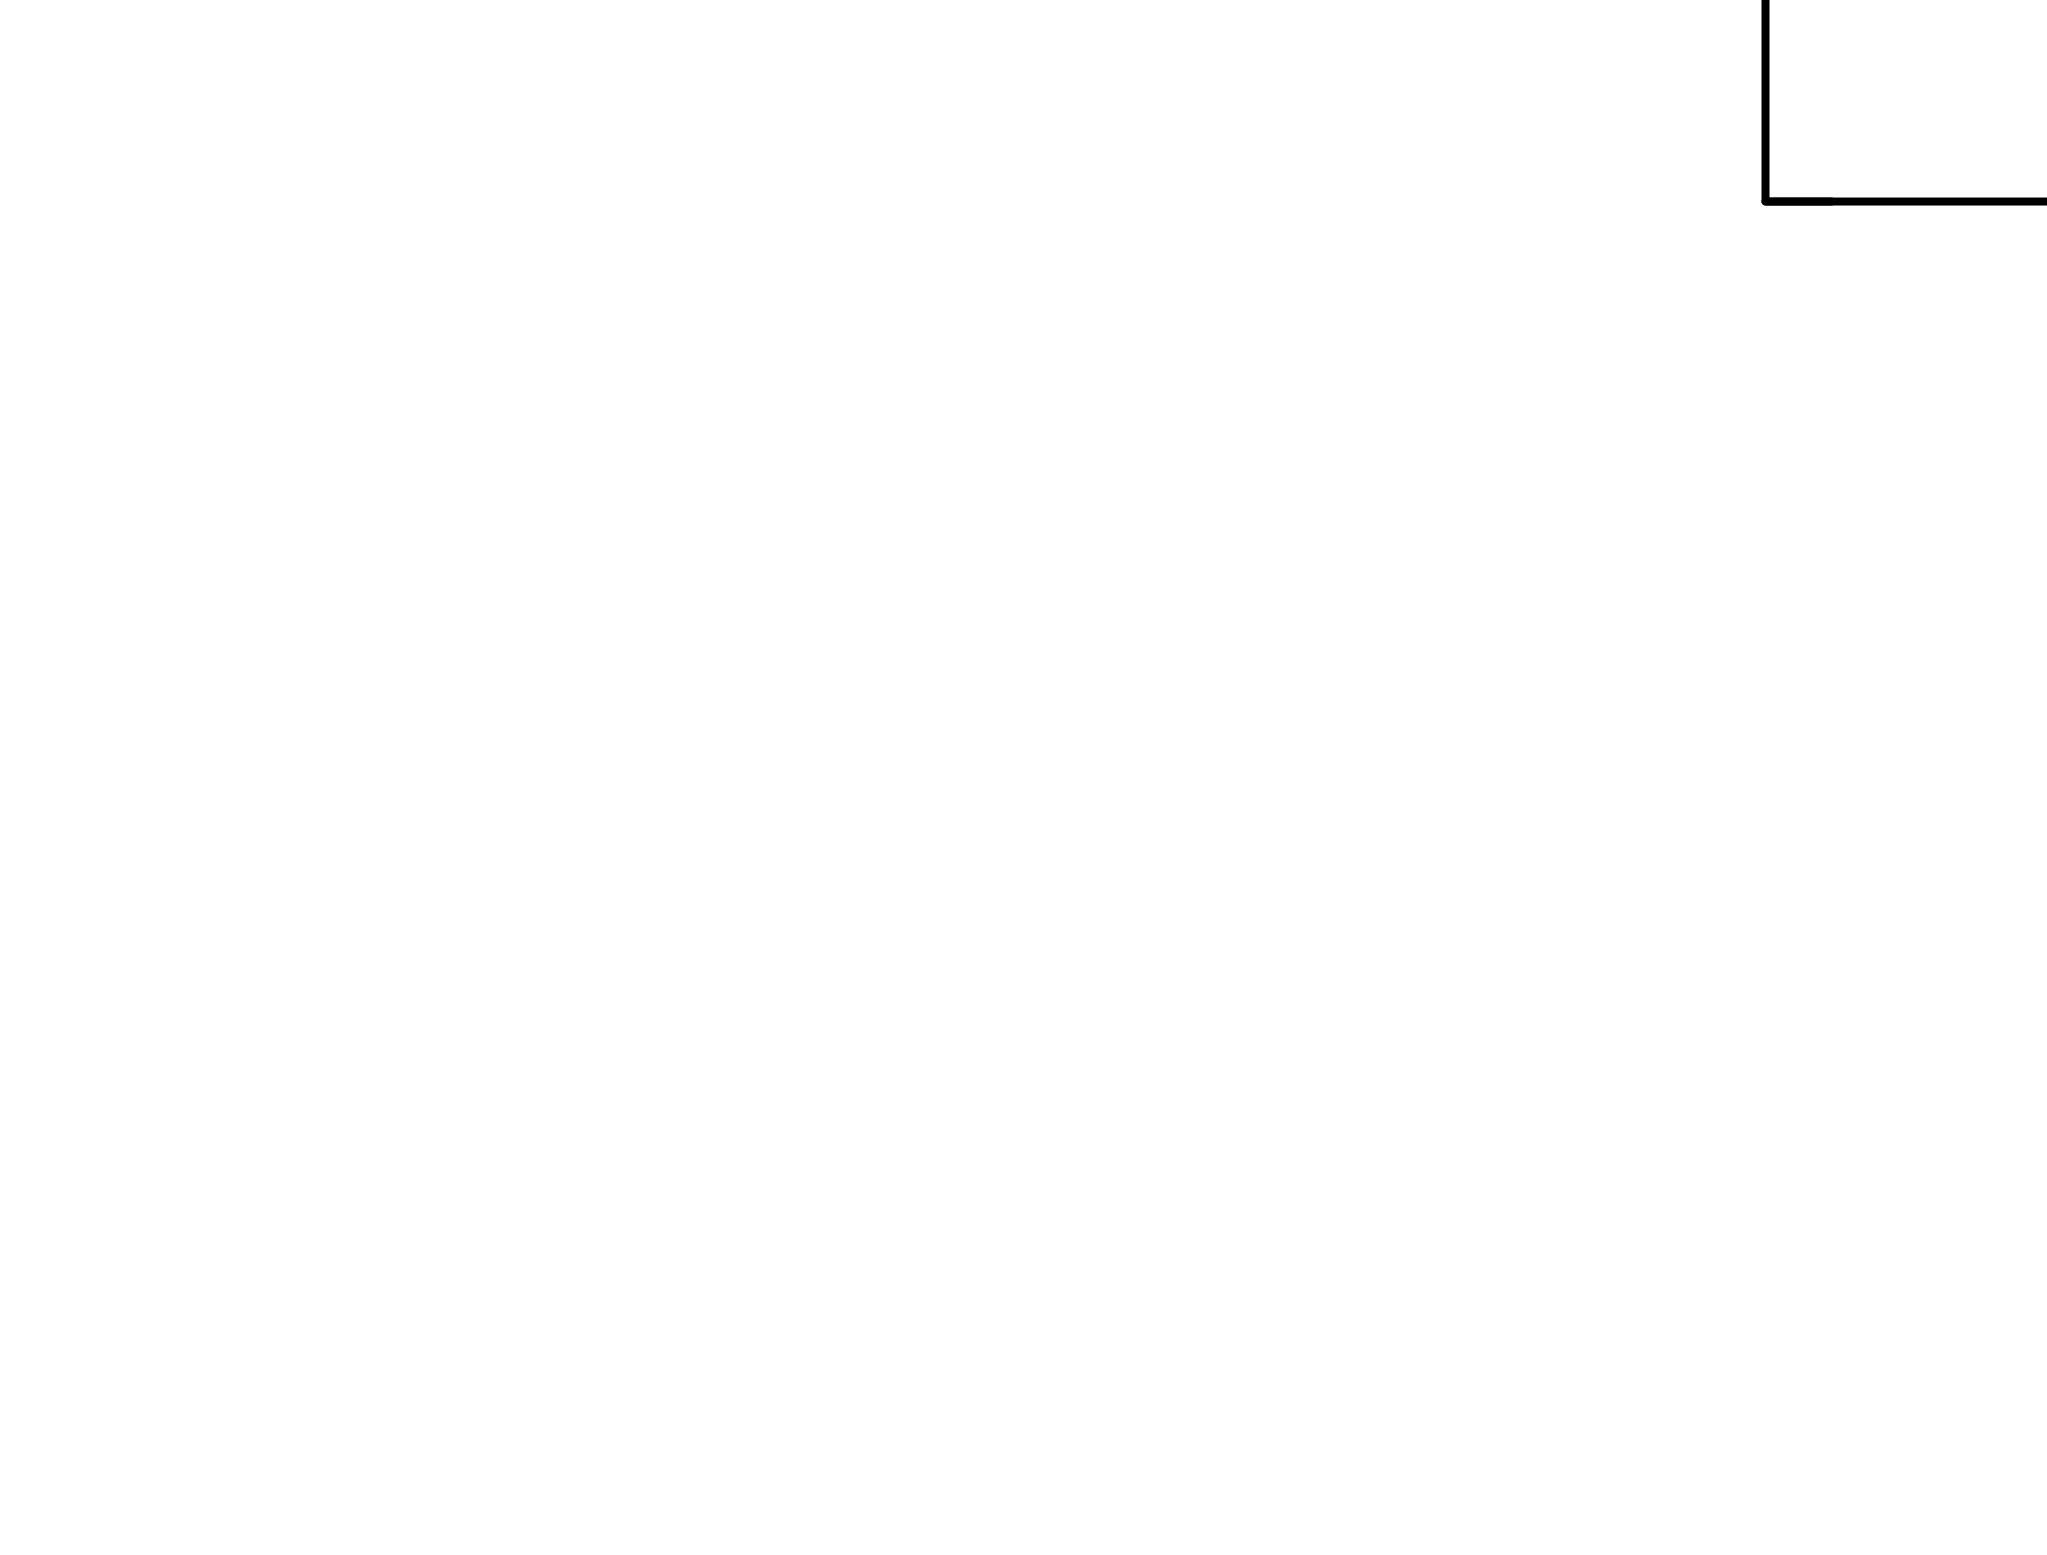

      No channels ignored (no channels in specified range)
     1 channels (9) ignored in spectrum #     1



In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.572470e+11     using 8 bins.



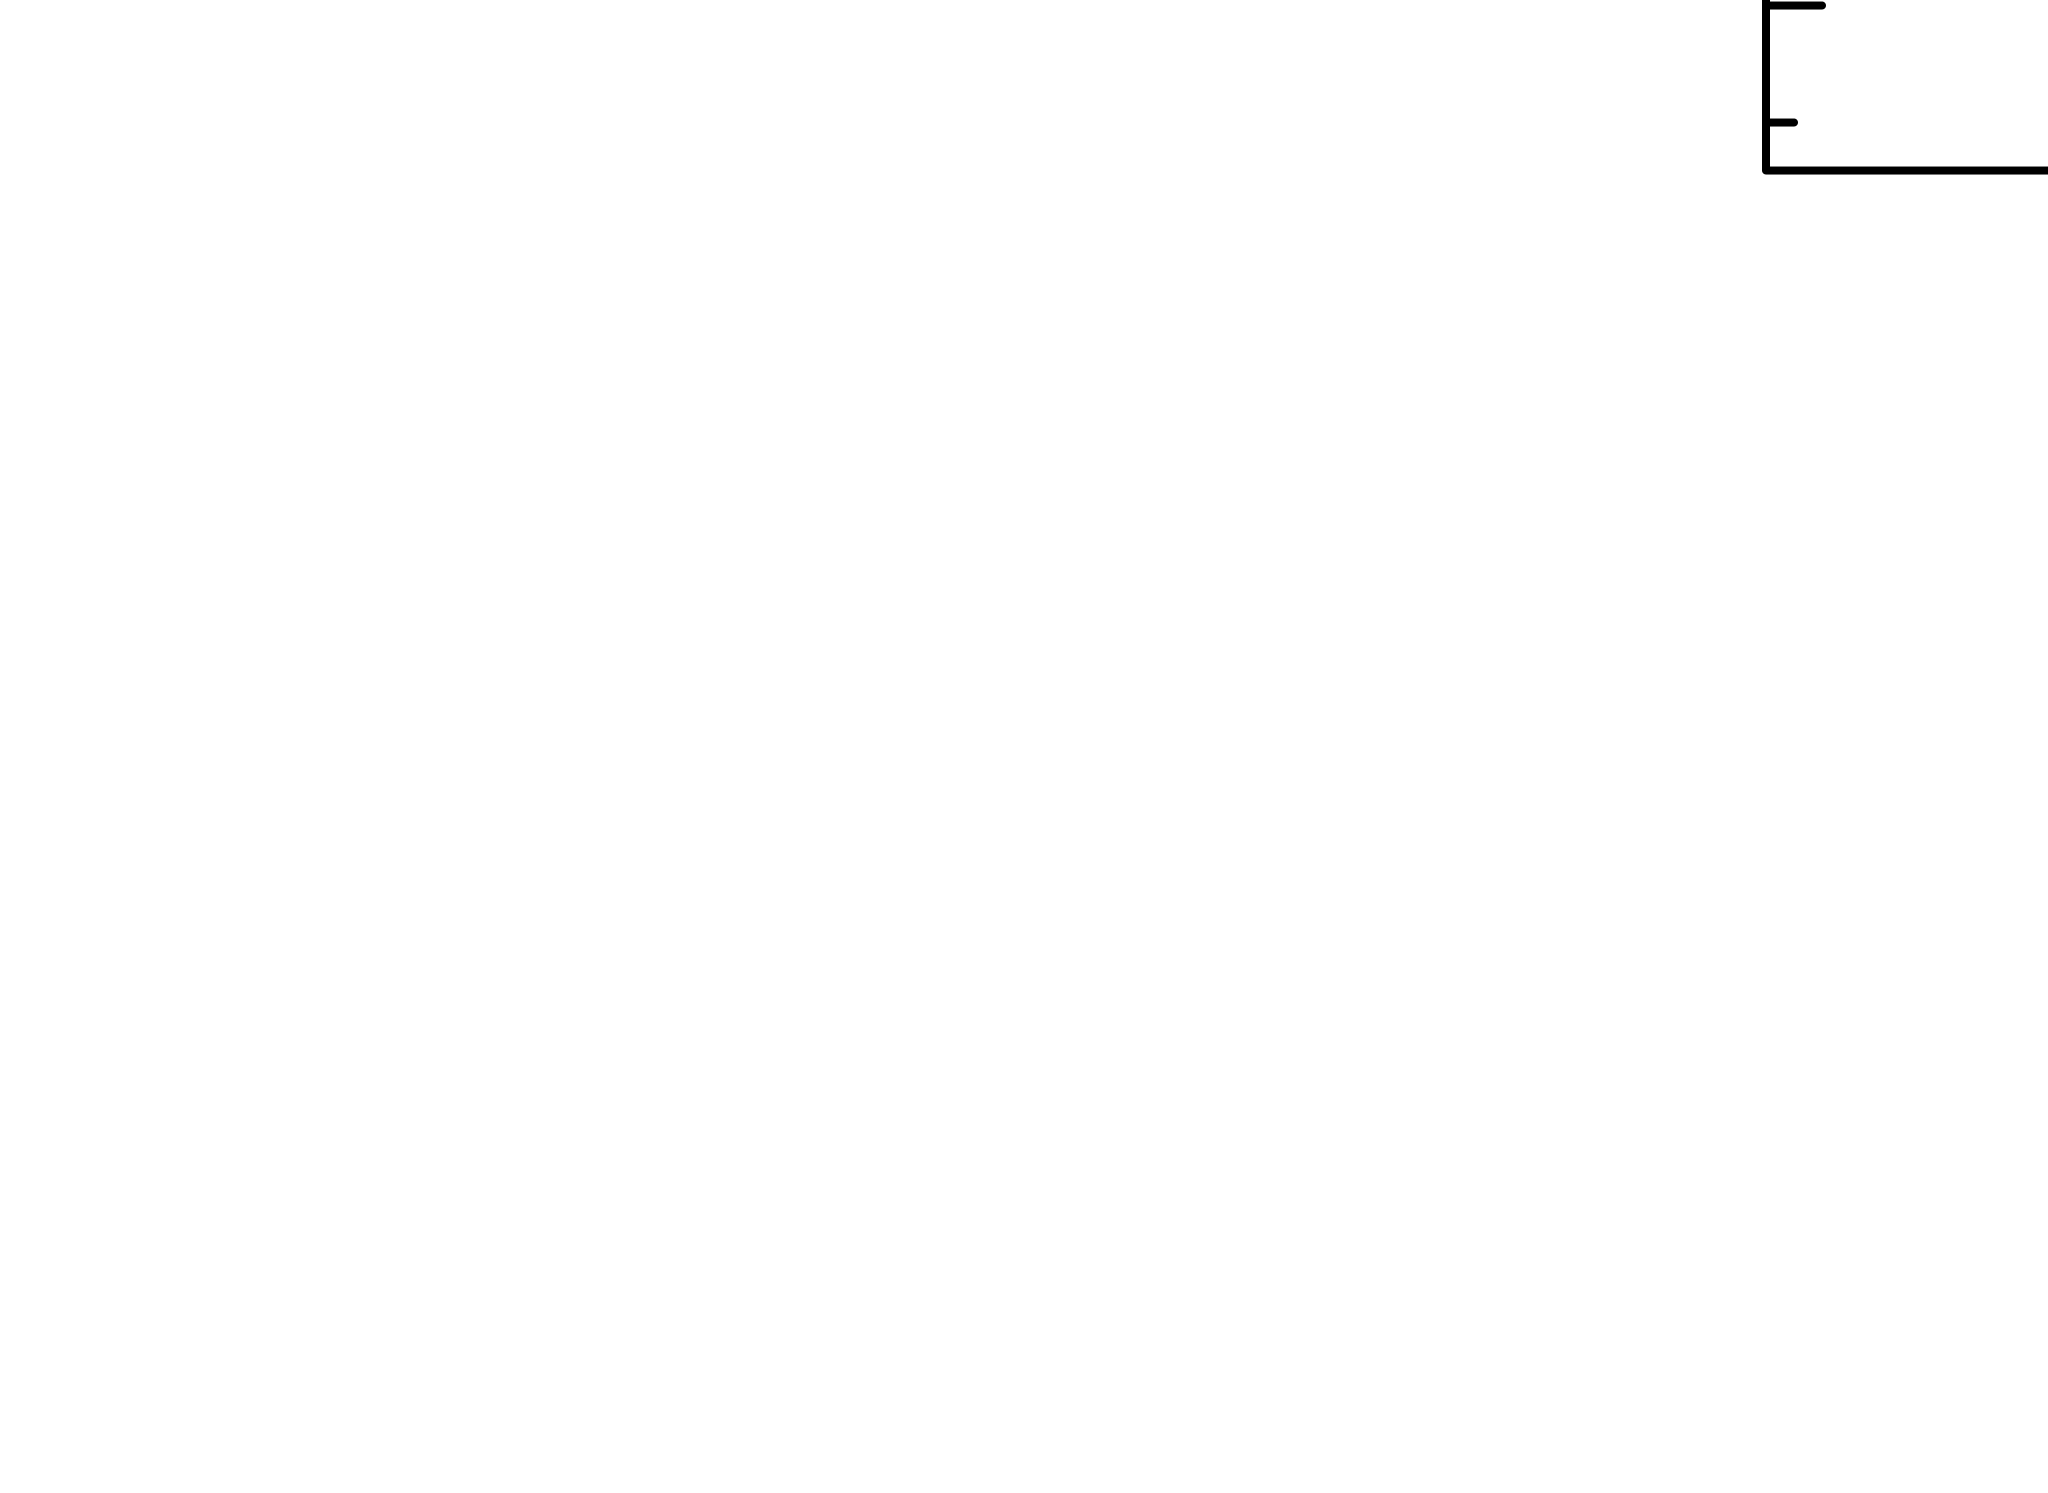

In [3]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.551333e+10     using 8 bins.

Test statistic : Chi-Squared              2.551333e+10     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.1976       3.75017      -1      0.499912       2.76759   5.15149e-05
4.58213      5674.77      -2      0.604548       2.99648   5.59343e-05
4.48798      636.647      -3      0.665072       2.61237   6.23177e-05
4.4

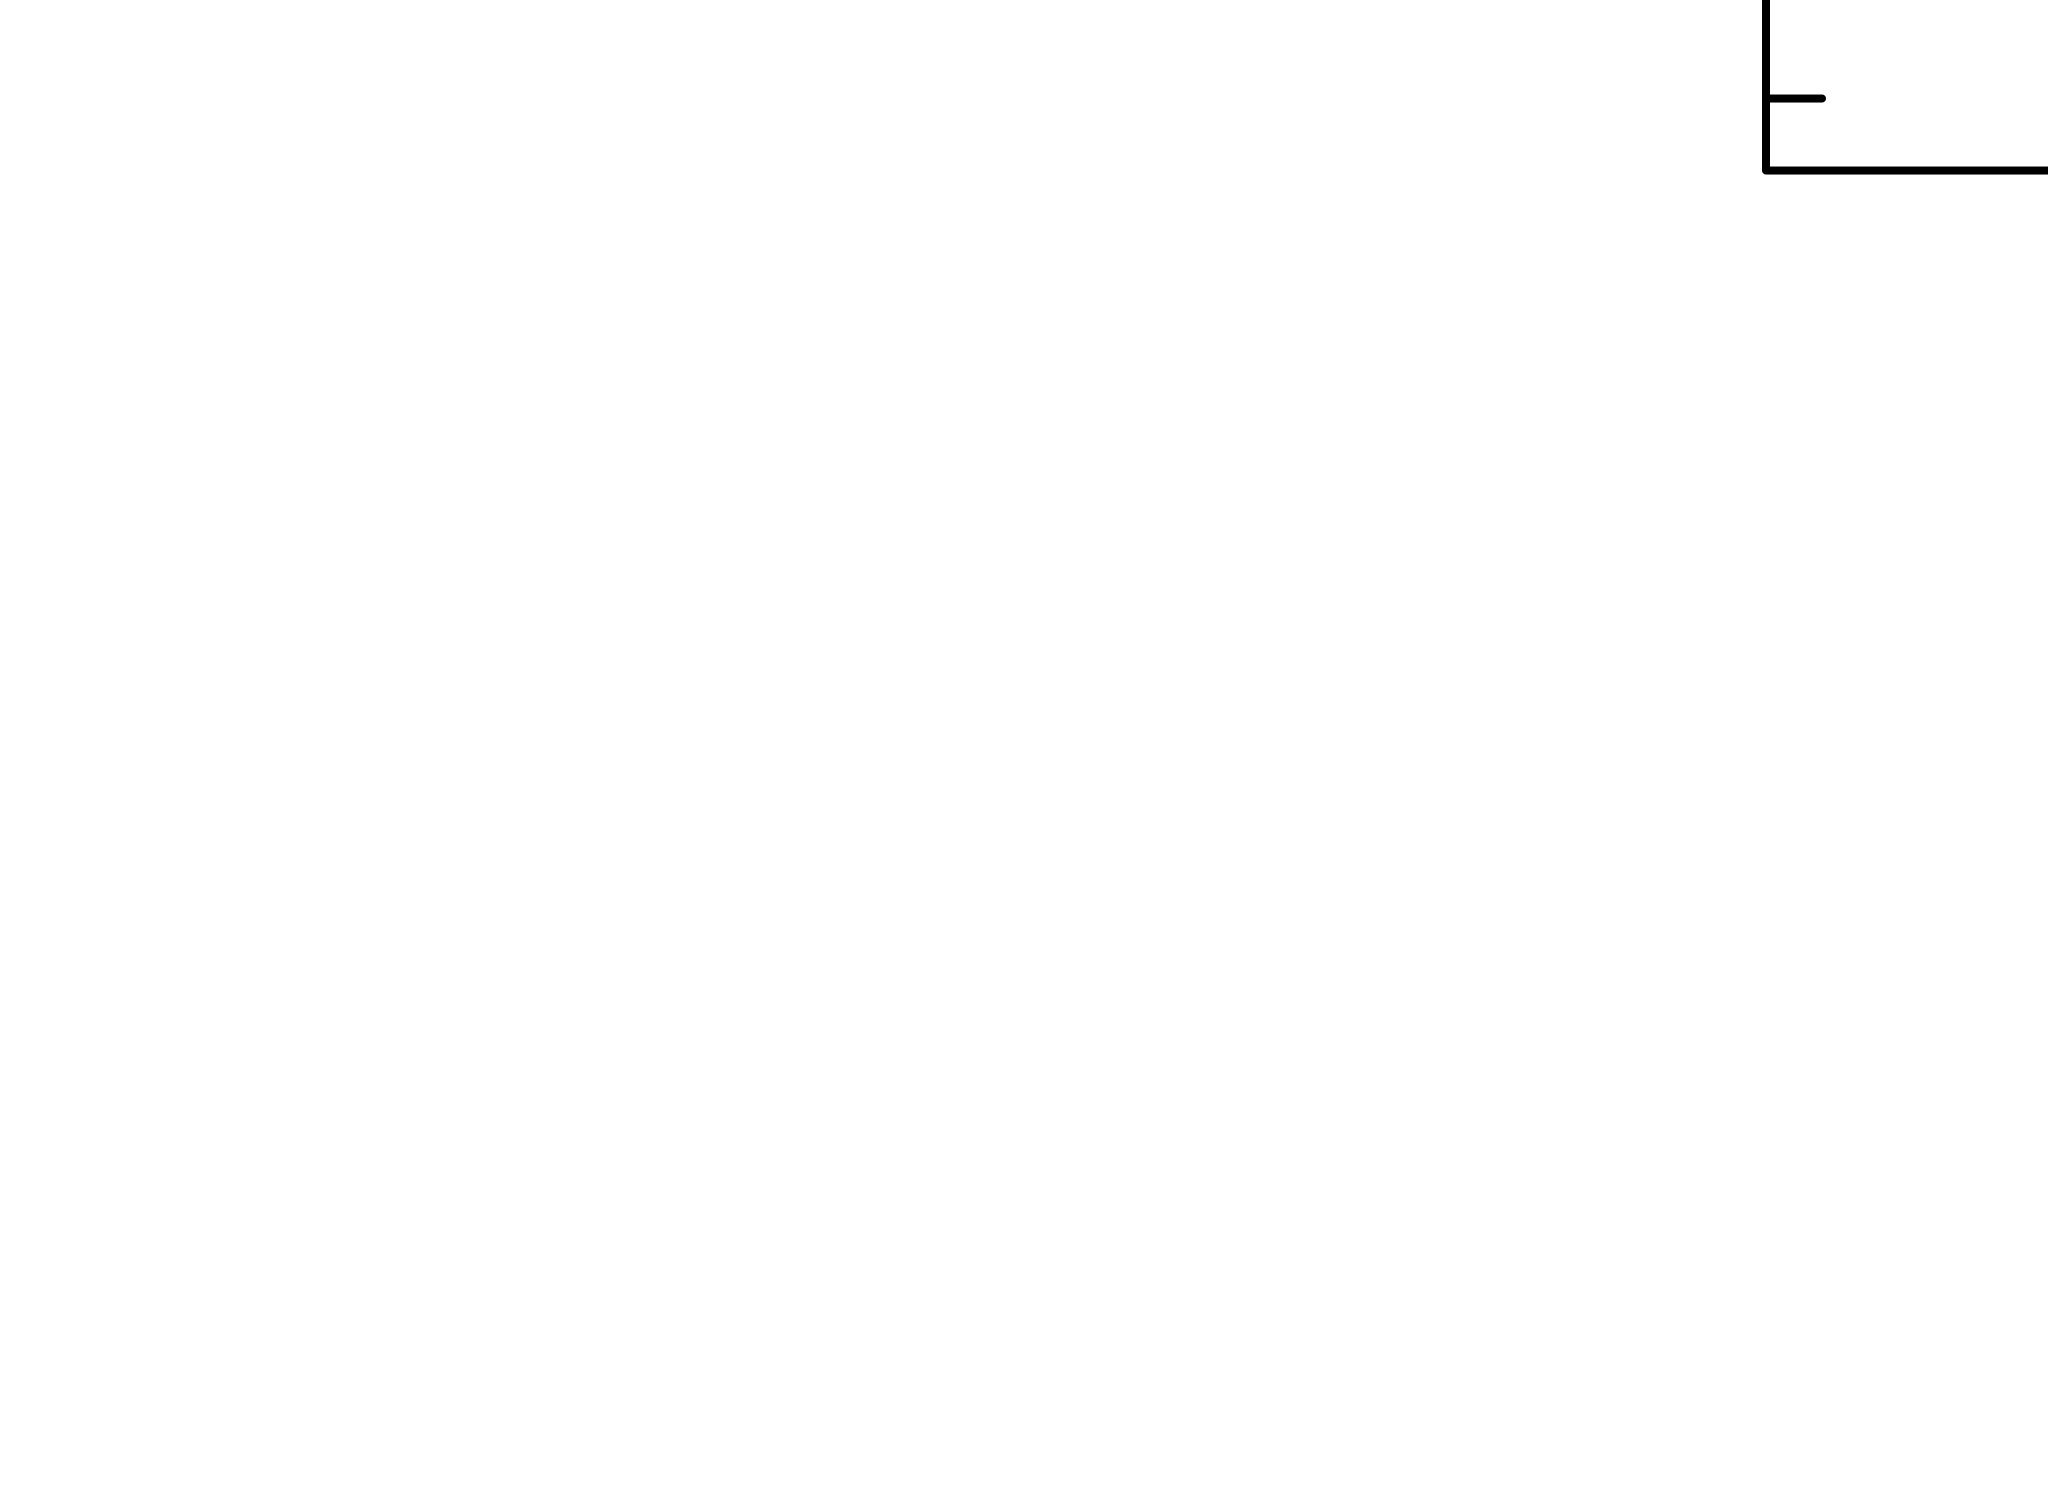

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              6.021971e+09     using 8 bins.

Test statistic : Chi-Squared              6.021971e+09     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
20.478       

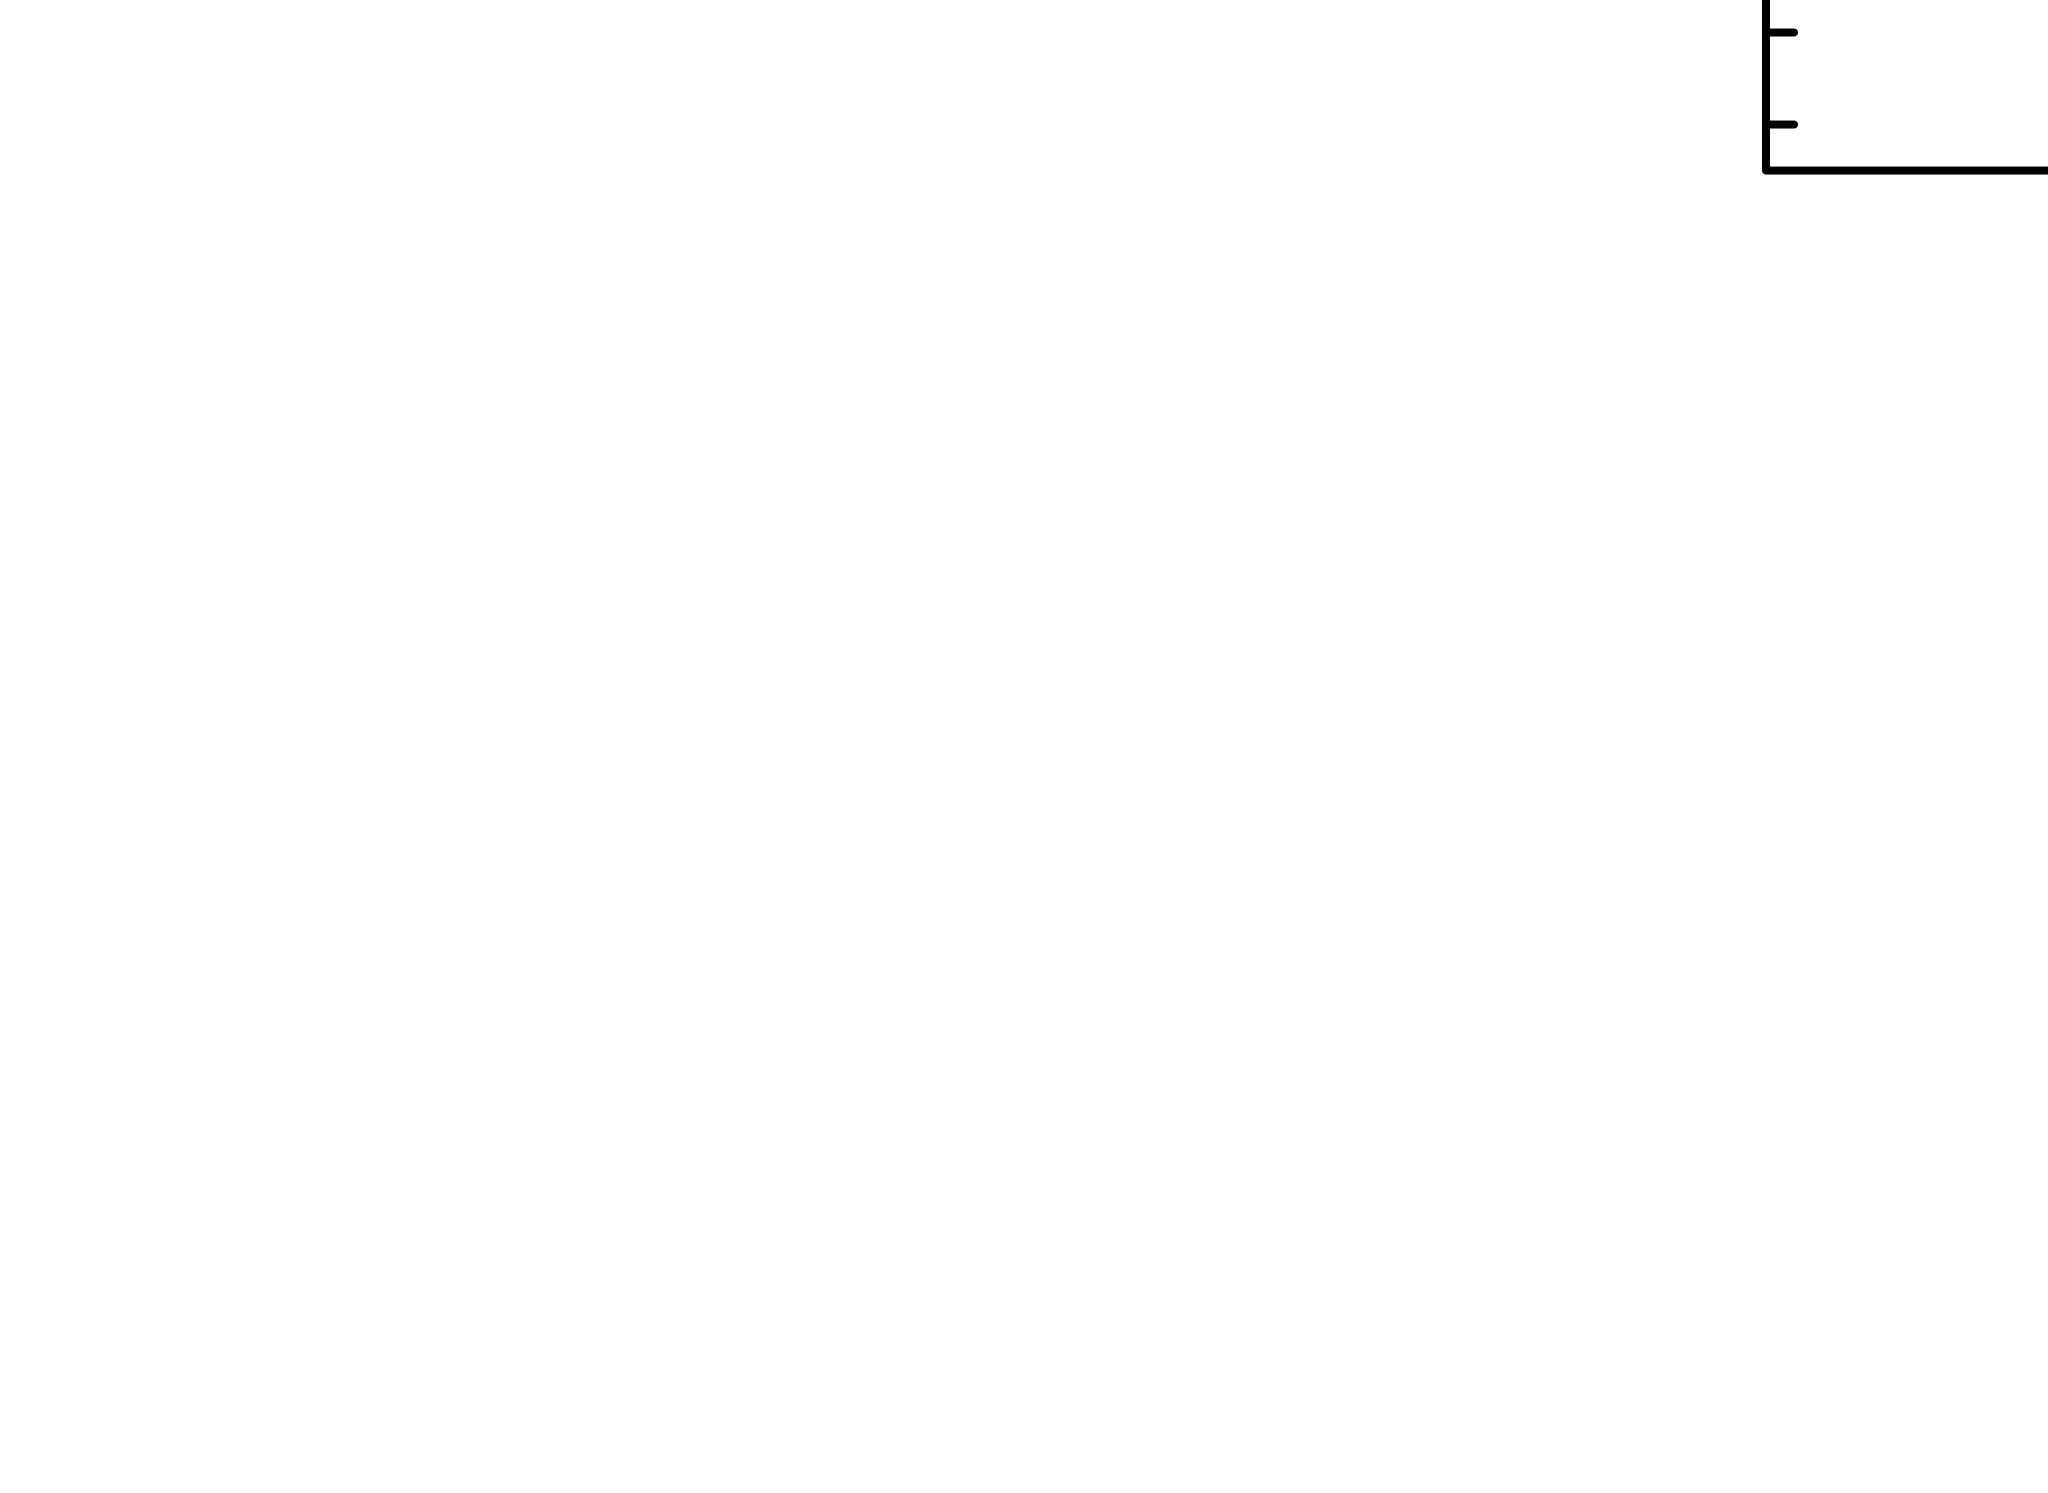

9.55269      -3       1.68663      0.850945   0.000208092
19.6828      20805.8      -3       1.08145       2.46128   9.74454e-05
7.70364      59161.4      -4      0.895773       2.38113   0.000153258
7.01692      11066.1      -5      0.807248       2.85904   0.000134547
6.78807      232.47       -6      0.706455       3.36574   0.000123869
6.63487      343.589      -7      0.626735       3.91440   0.000115724
6.60307      397.501      -8      0.596677       4.20243   0.000112896
6.59643      79.8276      -9      0.583521       4.31966   0.000111617
6.59559      19.859      -10      0.578797       4.35855   0.000111154
6.59529      2.10299     -11      0.576208       4.38807   0.000110899
6.59518      0.920736    -12      0.574631       4.40569   0.000110743
6.59514      0.334085    -13      0.573685       4.41629   0.000110650
 Variances and Principal Axes
                 1        2        5  
 1.6920E-10| -0.0001  -0.0000   1.0000  
 1.7493E-02|  0.9981   0.0620   0.0001  
 5.6986E+0

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.771991e+11     using 8 bins.

Test statistic : Chi-Squared              5.771991e+11     using 8 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
54.6474      1.09417       0      0.401838       3.16336   5.13178e-06
51.9845      352858        0      0.130006       3.14371   4.85284e-06
49.6921      471347       -1     0.0132371       2.72384   3.34931e-06
37.8

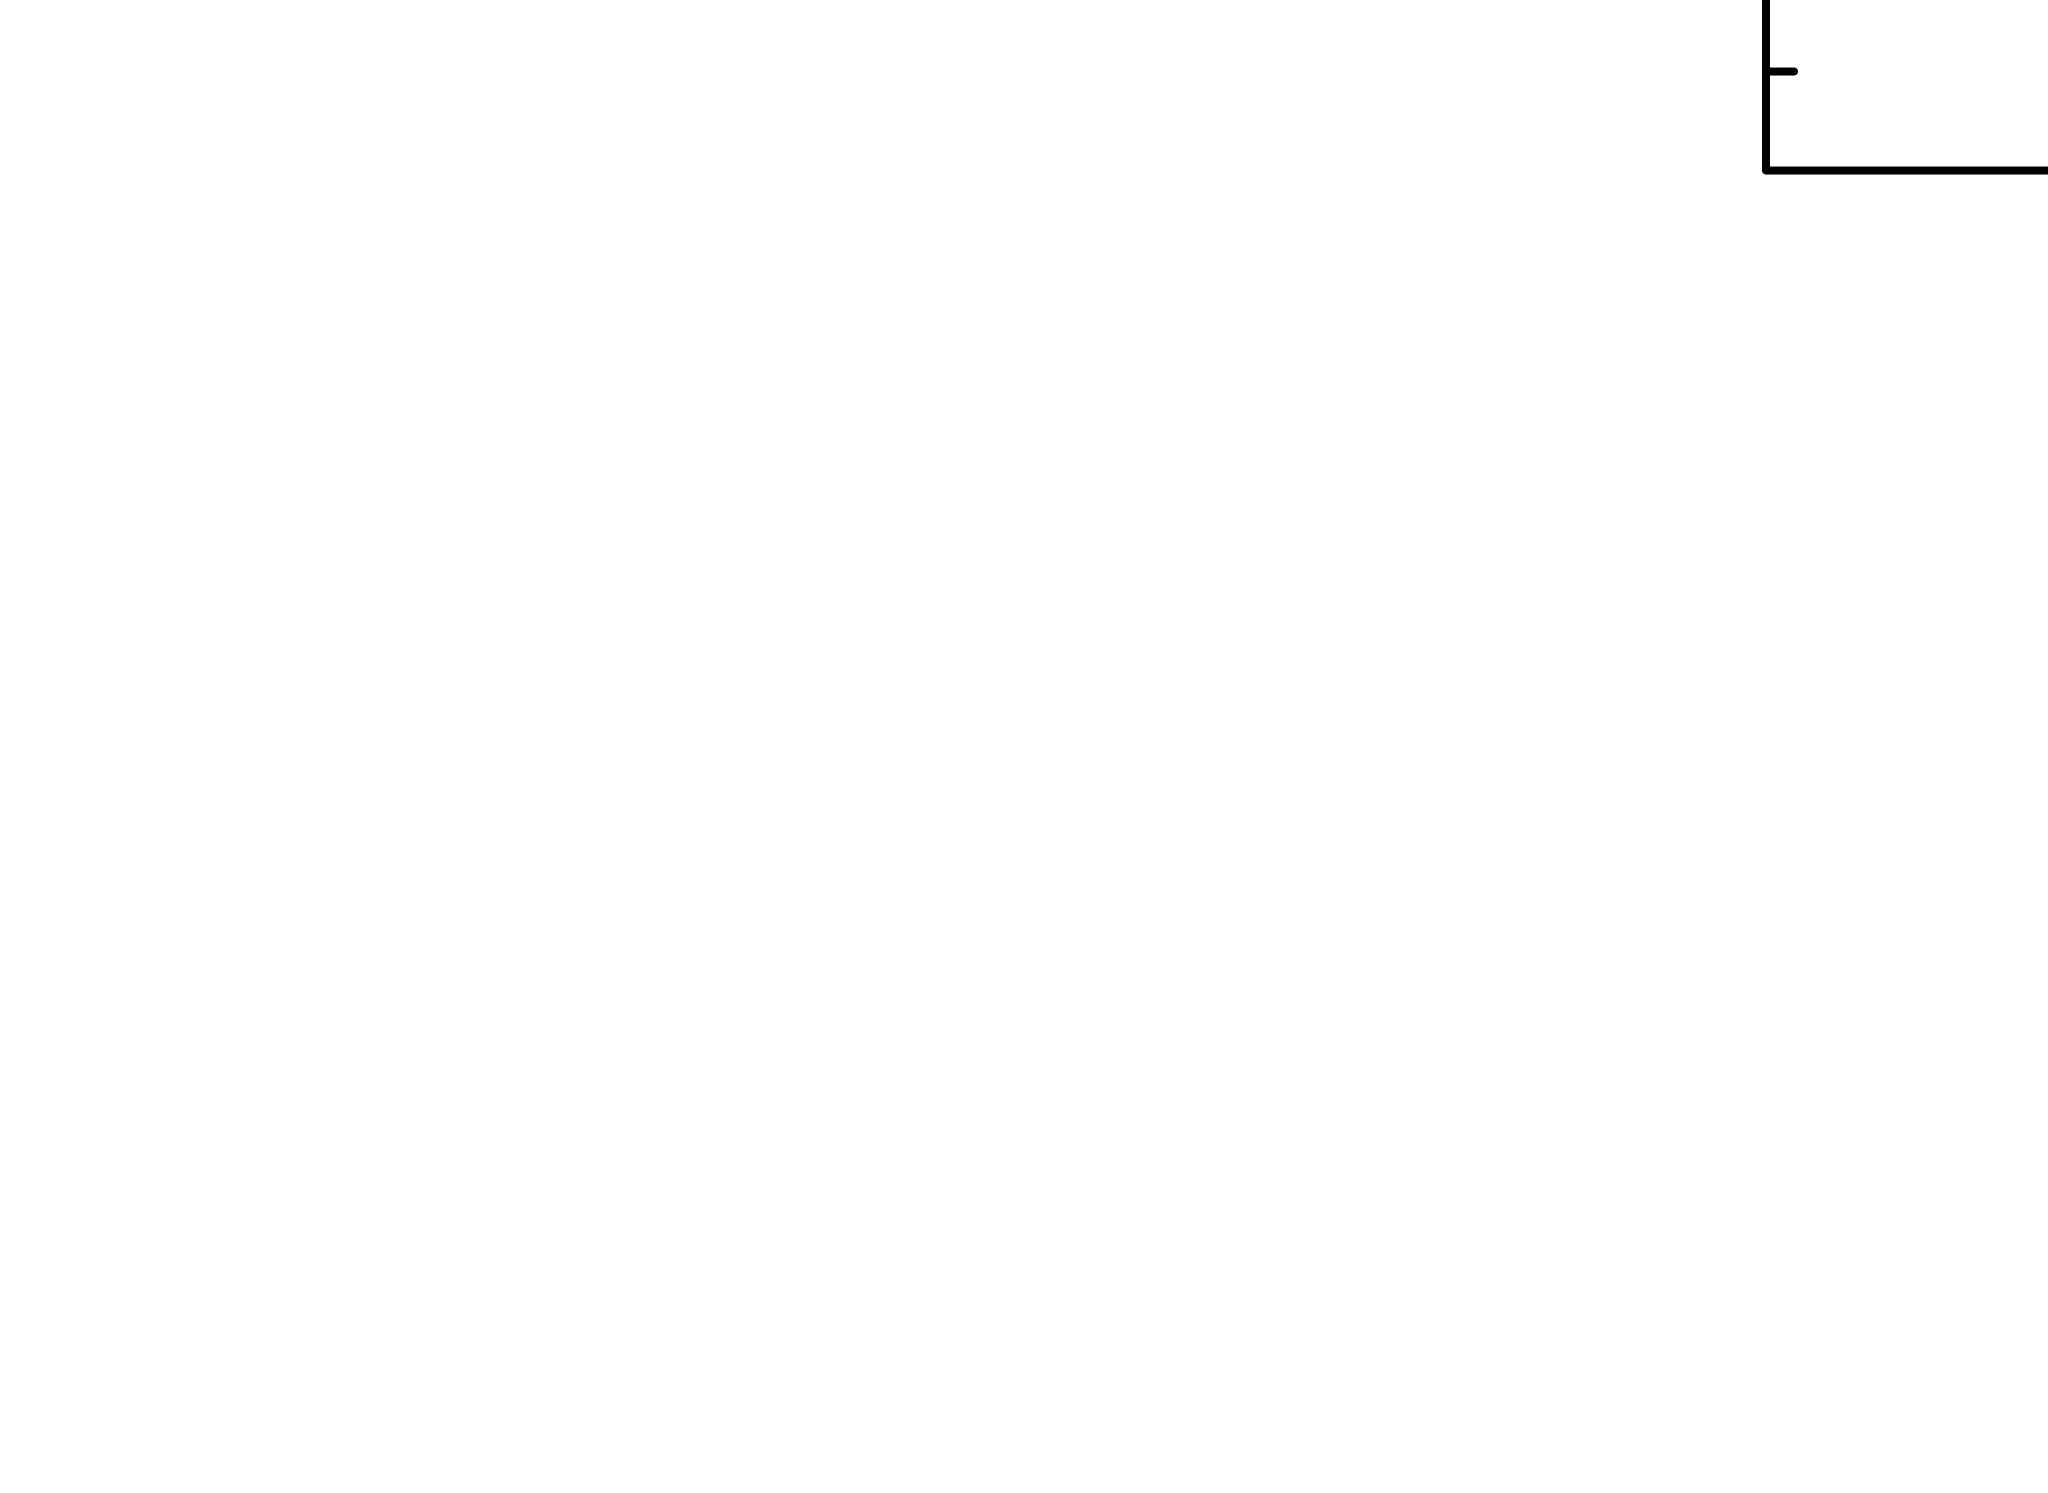

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.6233e-05 photons (9.3117e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 0.5317
d_kpc = 1/plx
F_x = 9.3117*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.9398268705468515e+31


In [9]:
F_opt = 1.05*10**-5 * 10**(-0.4*17.80)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  7.965064537806412e-13
F_x / F_opt:  0.11690677402300688
